In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [6]:
db='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
db=pd.read_csv(db)

In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [8]:
db.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [82]:
db.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_variable
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,older than 70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,11.65,24.3,between 35 and 70 years
231,231,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,5.25,31.7,older than 70
232,232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,2.47,41.7,older than 70
233,233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,3.95,48.3,older than 70


# Median value of owner-occupied homes 



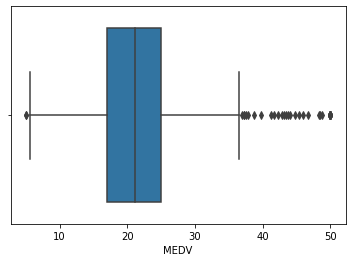

In [14]:
ax=sns.boxplot(data=db,x='MEDV')


# histogram for the Charles river variable



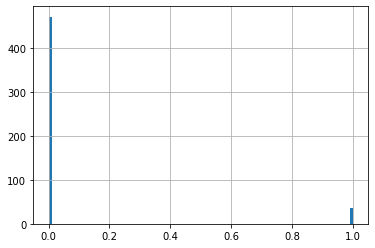

In [20]:
ax=db['CHAS'].hist(bins=100)

Findings: 

We can see that most of the population doesnt have a home near to the river 

# Provide a boxplot for the MEDV variable vs the AGE variable

In [41]:
#create group 
db.loc[(db['AGE']<=35),'age_variable']='35 years and younger'
db.loc[(db['AGE']>35)&(db['AGE']<=70),'age_variable']='between 35 and 70 years'
db.loc[(db['AGE']>70),'age_variable']='older than 70'


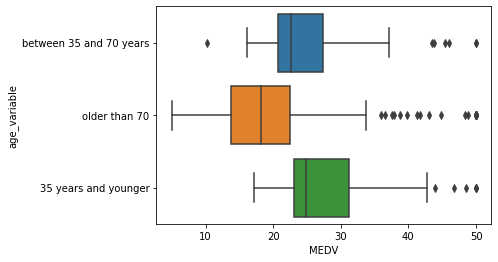

In [54]:
ax=sns.boxplot(data=db,x='MEDV',y='age_variable')

In [61]:
db.groupby(['age_variable']).describe()

Unnamed: 0                                        \
                             count        mean         std   min     25%   
age_variable                                                               
35 years and younger          91.0  212.571429  108.643980  16.0   81.00   
between 35 and 70 years      128.0  219.281250  143.338921   0.0   83.75   
older than 70                287.0  279.975610  152.158052   1.0  142.50   

                                                CRIM            ...   LSTAT  \
                           50%     75%    max  count      mean  ...     75%   
age_variable                                                    ...           
35 years and younger     243.0  291.50  495.0   91.0  0.105665  ...   8.030   
between 35 and 70 years  234.5  321.25  501.0  128.0  0.627314  ...  11.770   
older than 70            308.0  418.50  505.0  287.0  6.057600  ...  20.195   

                                 MEDV                                     \
                           max  count       mean       std   min     25%   
age_variable                                                               
35 years and younger     29.55   91.0  27.775824  7.638198  17.1  23.050   
between 35 and 70 years  16.20  128.0  24.947656  6.969370  10.2  20.675   
older than 70            37.97  287.0  19.793380  9.515375   5.0  13.800   

                                             
                          50%     75%   max  
age_variable                                 
35 years and younger     24.8  31.150  50.0  
between 35 and 70 years  22.6  27.425  50.0  
older than 70            18.2  22.550  50.0  

[3 rows x 112 columns]

Findings:

We can see that the youngest category has the highest median, meaning that 50% of them have housing that costs over $24,000.


We can see that the oldest category has the lowest median, meaning that 50% of them have a housing that costs less than $18,000

We can notice that the oldest category has many outliers. 



# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



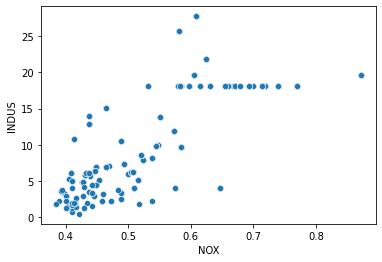

In [63]:
ax=sns.scatterplot(x='NOX',y='INDUS', data=db)

we can see a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. More concentrations there is, more proportion of non-retail business


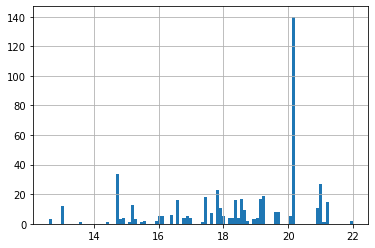

In [64]:
ax=db['PTRATIO'].hist(bins=100)

 the most PTRATIO represented is 20 students for each prof 

# TEST-T 

In [75]:
#variable X indépendante 
X=db['CHAS']

#variable Y indépendanre
Y=db['MEDV']

#equation 

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           7.39e-05
Time:                        19:30:52   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Findings 

**Conclusion:** the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis.there is a difference in mean evaluation scores based on river . The coefficient 6.3462 means that houses near to Charles's river  cost 6.3452$ more  than other.
the river explain 3,1% the median value 


# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 ?



In [ ]:
HO= there is no difference between the median values for each proportion of owner occupied units built prior to 1940
H1= there is a difference 

In [87]:
#ANOVA 

from statsmodels.formula.api import ols
jk = ols('MEDV ~ age_variable', data = db).fit()
table= sm.stats.anova_lm(jk)
print(table)

                 df        sum_sq      mean_sq         F        PR(>F)
age_variable    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual      503.0  37314.563532    74.184023       NaN           NaN


we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.
Age impact the MEDV

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [89]:
X=db['NOX']
y=db['INDUS']
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           7.91e-98
Time:                        20:18:58   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We reject H0. H1 is valid according to the p value and the R-squared. There is a huge correlation between the Nitric and de proportion of non retail business

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)



In [91]:
X=db['DIS']
y=db['MEDV']

#equation
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           1.21e-08
Time:                        20:33:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We reject H0.The impact of an additional weighted distance to the five Boston job centers increases the median value by 1,0916$